In [1]:
import sys
import numpy as np
import matplotlib.pyplot as plt
from scipy.interpolate import griddata

sys.path.append('/home/tpopova/prj/PB_SCF/08_2D_pore/py_files')

import config_loader
from out_reader import out_reader 

INFO:root:Конфигурация успешно загружена из /home/tpopova/prj/PB_SCF/08_2D_pore/py_files/config.yaml


In [2]:
# Загрузить конфигурацию
config = config_loader.load_config()

# Обновить параметр Cs
config = config_loader.update_config_param(config, "L_pore", 50)

# Сохранить обновлённую конфигурацию
config_loader.save_config(config)


INFO:root:Конфигурация успешно загружена из /home/tpopova/prj/PB_SCF/08_2D_pore/py_files/config.yaml
INFO:root:Обновление параметра L_pore на 50
INFO:root:Конфигурация успешно сохранена в /home/tpopova/prj/PB_SCF/08_2D_pore/py_files/config.yaml


In [3]:
x, y, psi, phi_brush, phi_end_brush = out_reader()

INFO:root:Конфигурация успешно загружена из /home/tpopova/prj/PB_SCF/08_2D_pore/py_files/config.yaml
INFO:root:Файл 2D_Cs_0_0010_L50_0_L_wall_10_0_space_10_0_v_-0_50_D_20_N_50_theta_62_83.in успешно создан в 2D_pore_in_files


Problem nr 1 out of 1
The program is compiled for the use of 'long double' while 'overflow_protection' is not requested for;
1. Turn on 'overflow_protection'.
2. Compile progrem without the #define 'LongReal' in namics.h. 
NEWTON has been notified.
Your guess:it =  0  E = 1.442199e+00 |g| = 2.818023e+00 alpha = 1.000000e+00 
hessian scaling: 0.26958
it =  1  E = 1.349933e+00 |g| = 2.715882e+00 alpha = 1.354859e-01 
it =  2  E = 2.647562e+00 |g| = 2.644207e+00 alpha = 3.165781e-02 
it =  3  E = 3.079989e+00 |g| = 2.597955e+00 alpha = 2.137802e-02 
it =  4  E = 3.679490e+00 |g| = 2.571335e+00 alpha = 1.385860e-02 
it =  5  E = 4.444470e+00 |g| = 2.552300e+00 alpha = 8.841883e-03 
it =  6  E = 5.092026e+00 |g| = 2.539679e+00 alpha = 6.306243e-03 
it =  7  E = 5.727648e+00 |g| = 2.528679e+00 alpha = 4.681977e-03 
it =  8  E = 6.105051e+00 |g| = 2.520385e+00 alpha = 3.886038e-03 
it =  9  E = 6.492195e+00 |g| = 2.512322e+00 alpha = 3.248917e-03 
it =  10  E = 6.634567e+00 |g| = 2.505782e+00

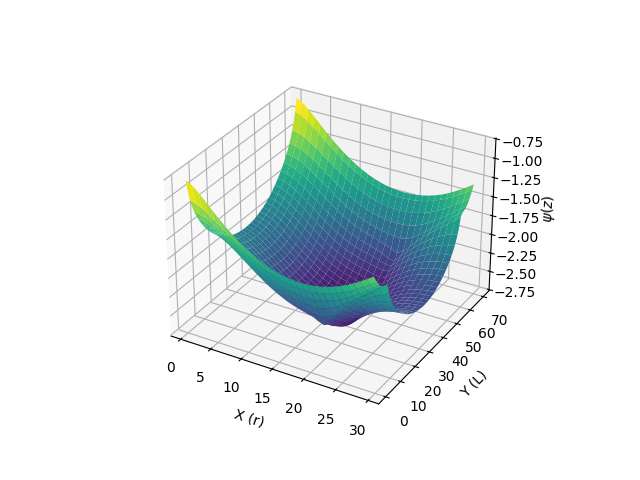

In [15]:
%matplotlib widget

# Создаем сетку для осей X и Y
x_grid, y_grid = np.meshgrid(np.unique(x), np.unique(y))

# Интерполяция значений Z для каждой точки сетки
z_grid = griddata((x, y), psi, (x_grid, y_grid), method='linear')

# Создаем фигуру для 3D графика
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

# Строим поверхность
ax.plot_surface(x_grid, y_grid, z_grid, cmap='viridis', edgecolor='none')

# Добавляем метки осей
ax.set_xlabel('X (r)')
ax.set_ylabel('Y (L)')
ax.set_zlabel('$\\psi(z)$')

# Показываем график
plt.show()